<a href="https://colab.research.google.com/github/eunDddo/MachineLearingColab/blob/main/ML_Regression_With_ScikitLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 28scikit-learn을 활용한 REgression - Boston 집 값 예측
#1. 데이터 불러오기

from sklearn.datasets import load_boston

boston_data = load_boston()
print(boston_data)

In [ ]:
#2 data 확인
print(boston_data.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
print(boston_data['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
#3. pandas data frame

import pandas as pd

boston_pd = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
#4. Add target
boston_pd['MEDV'] = boston_data.target
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#5. 빈 값 확인
boston_pd.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


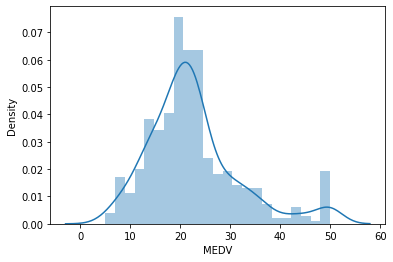

In [ ]:
#6. 집 값 분포 시각화
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(boston_pd['MEDV'])
plt.show()

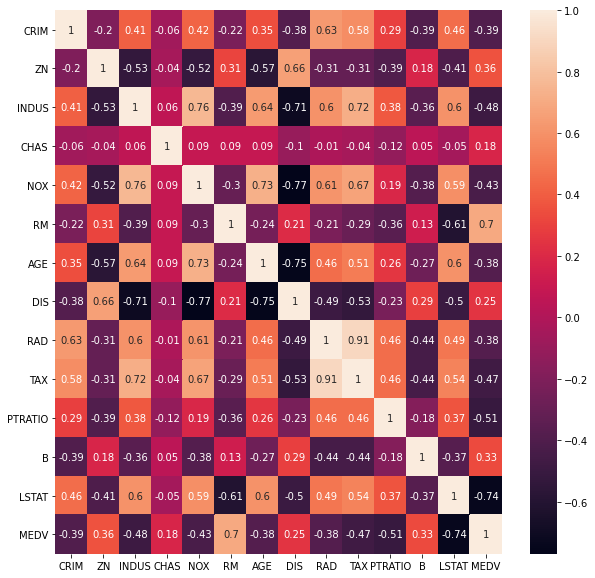

In [ ]:
#7. feature-target 상관관계 확인

correlation_matrix = boston_pd.corr().round(2)
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [ ]:
#8. X/Y 분리

X = boston_pd.drop(['MEDV', 'NOX', 'DIS', 'TAX'], axis=1)
Y = boston_pd['MEDV']

print(X.shape)
print(Y.shape)

(506, 10)
(506,)


In [ ]:
#9. 학습셋/평가셋 분리

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

print(X_train[0:5])
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

        CRIM   ZN  INDUS  CHAS     RM   AGE   RAD  PTRATIO       B  LSTAT
181  0.06888  0.0   2.46   0.0  6.144  62.2   3.0     17.8  396.90   9.45
122  0.09299  0.0  25.65   0.0  5.961  92.9   2.0     19.1  378.09  17.93
99   0.06860  0.0   2.89   0.0  7.416  62.5   2.0     18.0  396.90   6.19
220  0.35809  0.0   6.20   1.0  6.951  88.5   8.0     17.4  391.70   9.71
474  8.05579  0.0  18.10   0.0  5.427  95.4  24.0     20.2  352.58  18.14
(404, 10)
(102, 10)
(404,)
(102,)


In [ ]:
#10. 데이터 정규화

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train[0:9])

[[-0.40020526 -0.4954587  -1.27626786 -0.26761547 -0.19458528 -0.21547445
  -0.75941094 -0.2914471   0.43310562 -0.45366722]
 [-0.39751413 -0.4954587   2.10671382 -0.26761547 -0.45824043  0.86865458
  -0.8753603   0.31165777  0.20671329  0.74899745]
 [-0.40023651 -0.4954587  -1.213539   -0.26761547  1.63803407 -0.20488035
  -0.8753603  -0.19866174  0.43310562 -0.91601236]
 [-0.36792395 -0.4954587  -0.73067271  3.73670483  0.96809067  0.71327452
  -0.17966411 -0.47701783  0.37051975 -0.41679307]
 [ 0.49128503 -0.4954587   1.00531185 -0.26761547 -1.22759478  0.9569387
   1.67552572  0.82197728 -0.10031851  0.77878042]
 [-0.40045528 -0.4954587  -1.04431698 -0.26761547  0.38459159 -1.24310163
  -0.52751221 -0.84815929  0.3616133  -1.03798071]
 [-0.39209949 -0.4954587  -0.62709716 -0.26761547 -0.15856682 -2.17891333
  -0.75941094 -0.24505442  0.27026201 -0.96990535]
 [-0.4068823   3.3874766  -1.20186852 -0.26761547  1.16547185 -1.67745951
  -0.99130967 -1.45126417  0.4068677  -0.68058508]
 

In [ ]:
#11. Regression 학습
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#12. 모델 평가

y_predict = lin_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse= mean_squared_error(Y_test, y_predict)
r2 = r2_score(Y_test, y_predict)

print('MSE = {}'.format(mse))
print('R2 = {}'.format(r2))

MSE = 29.111903780681388
R2 = 0.7122959025355963


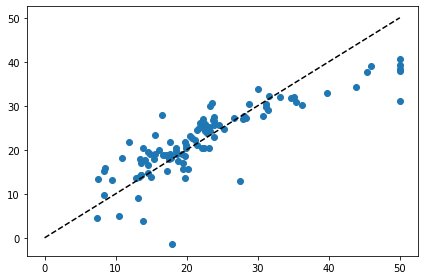

In [ ]:
#13. 모델 시각화
plt.scatter(Y_test, y_predict)
plt.plot([0,50],[0,50],'--k')
plt.tight_layout()